In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt 

# Tensor decompositions for transcriptomics

#### Bogdan Kirillov, Arman Petrosyants, Svetlana Pavlova, Dmitry Prodan, Olga Gorbunova

## What is transcriptomics anyway?

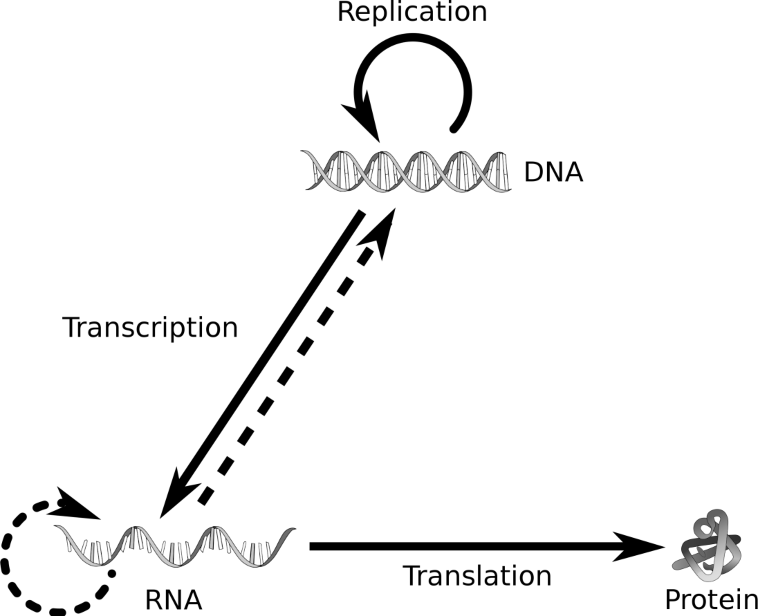

In [3]:
Image("Central_dogma_of_molecular_biology.svg.png")

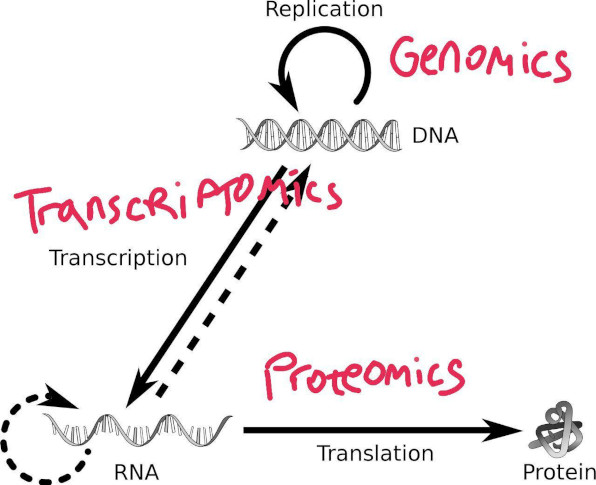

In [4]:
Image("WIT.jpg")

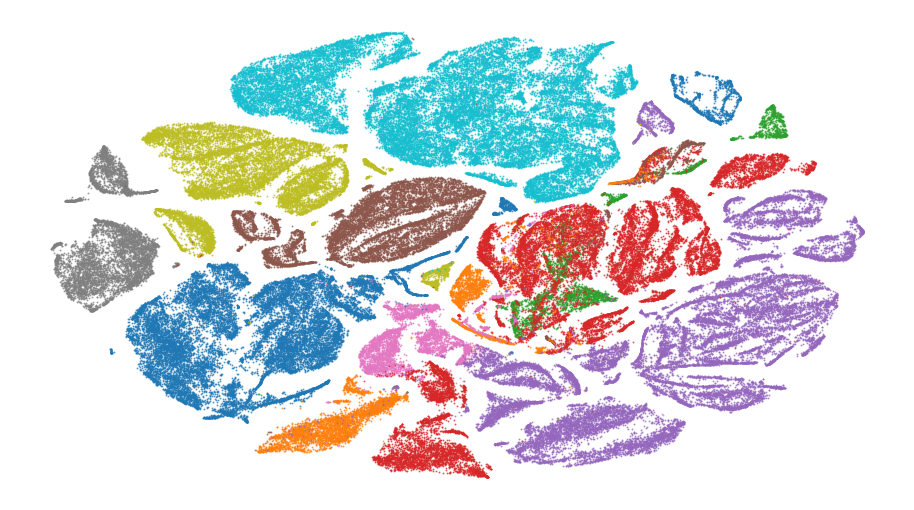

In [5]:
Image("zeisel_2018.png")

## A typical transcriptomics dataset

In [6]:
import scipy.io as sio
import numpy as np
import pandas as pd

In [7]:
tenx = sio.mmread("../data/tenx.mtx")

In [8]:
tenx.shape

(41580, 1999)

In [9]:
tenx_obs = pd.read_csv("../data/tenx_obs.csv", index_col=0)

In [10]:
tenx_obs.head()

,sample_name,cell_barcode,cluster_color,cluster,cluster_id,cell_types,sex_label,batch_indices,cell_counts,n_genes,percent_mito,pass_count_filter,pass_mito_filter
0,10x_VMH_Female_Control_1,4_AAACCTGAGCGCCTCA,#9162FF,Nr5a1_4,24.0,undefined,F,0,1427.0,926,13.594954,True,False
1,10x_VMH_Female_Control_1,4_AAACCTGCACAGTCGC,#96FF2E,Tsix_Esr1_1,3.0,undefined,F,0,4508.0,2310,9.272405,True,False
2,10x_VMH_Female_Control_1,4_AAACCTGCAGATTGCT,#66ABC2,Dlk1_3,16.0,undefined,F,0,3447.0,1995,5.483029,True,False
3,10x_VMH_Female_Control_1,4_AAACCTGCATACTCTT,#96FF2E,Tsix_Esr1_1,3.0,undefined,F,0,7004.0,3286,4.483152,True,True
4,10x_VMH_Female_Control_1,4_AAACCTGGTCCGTTAA,#24EFCD,Scgn,20.0,undefined,F,0,2490.0,1492,9.277108,True,False


## UMAP and t-SNE

In [9]:
from umap import UMAP

In [10]:
u = UMAP()
tenx_umap = u.fit_transform(tenx)

In [11]:
tenx_umap.shape

(41580, 2)

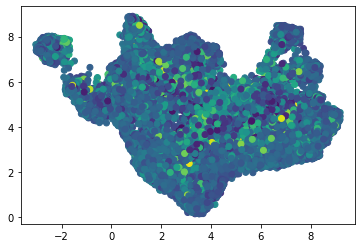

In [12]:
plt.scatter(tenx_umap.T[0], tenx_umap.T[1], c=tenx_obs["percent_mito"])
plt.show()

## Problems with UMAP and t-SNE

##### Johnson-Lindenstrauss lemma

Let $N\gg 1$. Given $0 < \epsilon < 1$, a set of $m$ points in $\mathbb{R}^N$ and $n > \frac{8 \log m}{\epsilon^2}$ (we want $n\ll N$).

Then there exists linear map $f$ from $\mathbb{R}^N \rightarrow \mathbb{R}^n$ such that the following inequality holds:

$$(1 - \epsilon) \Vert u - v \Vert^2 \leq \Vert f(u) - f(v) \Vert^2 \leq (1 + \epsilon) \Vert u - v \Vert^2.$$

In [22]:
m = tenx.shape[0]
epsilon = np.array([0.5, 0.1, 0.01, 0.001])
n_lower = (8*np.log(m)/(epsilon**2)).astype(np.int32)
n_lower

array([     340,     8508,   850829, 85082996], dtype=int32)

### UMAP and T-SNE are 

## Why tensor decompositions?

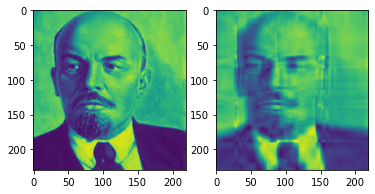

In [9]:
import cv2
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt
from tensorly.decomposition import tucker
lenin = cv2.cvtColor(
    cv2.imread("ленин.jpeg"), cv2.COLOR_BGR2GRAY
).astype(np.float32)
mold, linden_honey = tucker(lenin, [10,10])
fig, ax = plt.subplots(1,2)
ax[0].imshow(lenin)
ax[1].imshow(tl.tucker_to_tensor((mold, linden_honey)))
plt.show()